In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, relu, load_planar_dataset, load_extra_datasets
#%matplotlib inline
np.random.seed(1) # establece una semilla(seed) para que los resultados sean consistentes

ModuleNotFoundError: No module named 'sklearn'

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


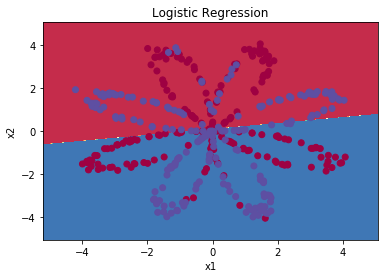

In [22]:
### PARA EL JUEGO DE CAMBIAR LA FUNCION DE ACTIVACION DE LAS CAPAS
def _relu (x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
X, Y = load_planar_dataset()


#plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);
#Actividad 1
shape_X = X.shape
shape_Y = Y.shape
m = Y.size
# print ('la dimension de X es: ' + str(shape_X))
# print ('la dimension de Y es: ' + str(shape_Y))
# print ("hay m = ",m," ejemplos de entrenamiento")

# Entrenando el clasificador de la regresión logística
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T.ravel());

# Plot el límite de decisión para la regresión logística
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")
# Imprimir la precesión ( accuracy)
LR_predictions = clf.predict(X.T)
# print ("prec,de reg, log:",str( ( np.dot(Y,LR_predictions) + 
#                                  np.dot(1-Y,1-LR_predictions) )/float(Y.size)*100 ) + 
#                                    "porcentaje de correcion de los puntos")

#Actividad 2
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

X_assess, Y_assess = layer_sizes_test_case()

(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
# print("Tamaño de la capa de entrada: n_x = " + str(n_x))
# print("Tamaño de la capa oculta: n_h = " + str(n_h))
# print("Tamaño de la capa de salida: n_y = " + str(n_y))

# Actividd 3
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) 
    # configura una semilla para que su salida coincida con la esperada,aunque la inicialización es aleatoria.
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == ((n_h, 1)))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == ((n_y, 1)))
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2
    }
    return parameters

# Probando la Funcion
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

# Probando la Funcion
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

#Actividad 4

def forward_propagation(X, parameters):
    # Recupera cada parámetro del diccionario "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implementa Forward Propagation para calcular A2
    Z1 = np.dot(W1, X) + b1
    #A1 = _relu(Z1)
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
    "A1": A1,
    "Z2": Z2,
    "A2": A2}
    return A2, cache

# Probando la función
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
# Note: Se calcula la media solo para asegurarnos de que su salida coincida
# print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

# Actividad 5
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]
    cost = (-1/m)*(np.sum(Y*np.log(A2)+ (1-Y)*np.log(1-A2)))
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

# Actividad 6

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    # Recuperar los datos A1 and A2 del diccionario "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    # Backward propagation: calcular dW1, db1, dW2, db2.
    dZ2= A2-Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2}
    return grads

# Probando la función
# parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
# grads = backward_propagation(parameters, cache, X_assess, Y_assess)
# print ("dW1 = "+ str(grads["dW1"]))
# print ("db1 = "+ str(grads["db1"]))
# print ("dW2 = "+ str(grads["dW2"]))
# print ("db2 = "+ str(grads["db2"]))

#Actividad 7
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    # Actualizando los parámetros
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}
    return parameters

# #Probando la función
# parameters, grads = update_parameters_test_case()
# parameters = update_parameters(parameters, grads)
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

In [23]:
#actividad 8
def nn_model(X, Y, n_h, num_iterations = 10000, learning_rate = 1.2, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # Llamando a la función: Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Llamando a la función: Forward propagation.
        A2, cache = forward_propagation(X, parameters)
        # Llamando a la función: Cost function.
        cost = compute_cost(A2, Y, parameters)
        # llamando a la funcion Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        # Llamar a la función Gradient descent parameter update.
        parameters = update_parameters(parameters, grads, learning_rate)
        # Print the cost every 1000 iterations
        if print_cost and i % 10000 == 0:
            print ("Costo despues de iteracion: ",i," = ", cost)
    return parameters

In [31]:
alpha = 0.001
num_iterations = 100001
d = nn_model(X, Y, n_h, num_iterations, alpha, print_cost=True)
print (d)

Costo despues de iteracion:  0  =  0.6932554219250838
Costo despues de iteracion:  10000  =  0.6798398943796358
Costo despues de iteracion:  20000  =  0.6738987333972558
Costo despues de iteracion:  30000  =  0.67372336769558
Costo despues de iteracion:  40000  =  0.6735719126516773
Costo despues de iteracion:  50000  =  0.6733813500231554
Costo despues de iteracion:  60000  =  0.6730837353389716
Costo despues de iteracion:  70000  =  0.6725101518049575
Costo despues de iteracion:  80000  =  0.671109053999545
Costo despues de iteracion:  90000  =  0.6668811648487811
Costo despues de iteracion:  100000  =  0.6551544983797766
{'W1': array([[ 1.58429864e-03,  1.33860465e-02],
       [-4.37669322e-01,  3.08540208e-01],
       [-1.55122843e-02,  1.09628918e-02],
       [-8.24944810e-03, -2.61259201e-02],
       [-2.70143134e-02, -2.11146951e-02],
       [ 8.49517833e-02,  3.19752528e-02],
       [-9.13770851e-03, -1.81841243e-02],
       [ 1.18404613e-02,  1.13295193e-02],
       [-2.619314

In [32]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.rint(A2)
    return predictions
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Costo despues de iteracion:  0  =  0.6930480201239823
Costo despues de iteracion:  10000  =  0.6889239726089132
Costo despues de iteracion:  20000  =  0.6775322941578983
Costo despues de iteracion:  30000  =  0.670317386316002
Costo despues de iteracion:  40000  =  0.649597662910202
Costo despues de iteracion:  50000  =  0.6306707567464702
Costo despues de iteracion:  60000  =  0.6218528399235459
Costo despues de iteracion:  70000  =  0.6171096019607051
Costo despues de iteracion:  80000  =  0.6136034966005997
Costo despues de iteracion:  90000  =  0.6106658804752074
Costo despues de iteracion:  100000  =  0.6081591879441436


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

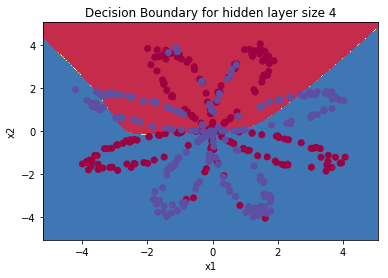

In [41]:
#parameters = nn_model(X, Y, n_h = 4, num_iterations = 100001 , print_cost=True)
parameters = nn_model(X, Y, 4, num_iterations, alpha, print_cost=True)
# Plot el límite de decisión
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
plt.title("Decision Boundary for hidden layer size " + str(4))

In [42]:
# Print accuracy
predictions = predict(parameters, X)
print ("precision (accuracy): ",str(float( (np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T) )/ float(Y.size)*100 )) + "%")

precision (accuracy):  55.75%


Precision para 55 capas ocultas: 54.0 %


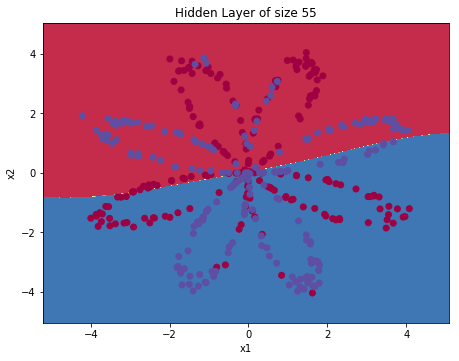

In [45]:
plt.figure(figsize=(16, 32))
#hidden_layer_sizes = [50,51,52,53,54,55,56,60,100]
hidden_layer_sizes = [55]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations,alpha)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Precision para {} capas ocultas: {} %".format(n_h, accuracy))